In [ ]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install rasterio

In [ ]:
#อัปไฟล์สำหรับการเทรน
from google.colab import files

uploaded = files.upload()


Saving NDVI001.tif to NDVI001 (1).tif
Saving NDVI002.tif to NDVI002 (1).tif
Saving NDVI003.tif to NDVI003 (1).tif
Saving NDVI004.tif to NDVI004 (1).tif


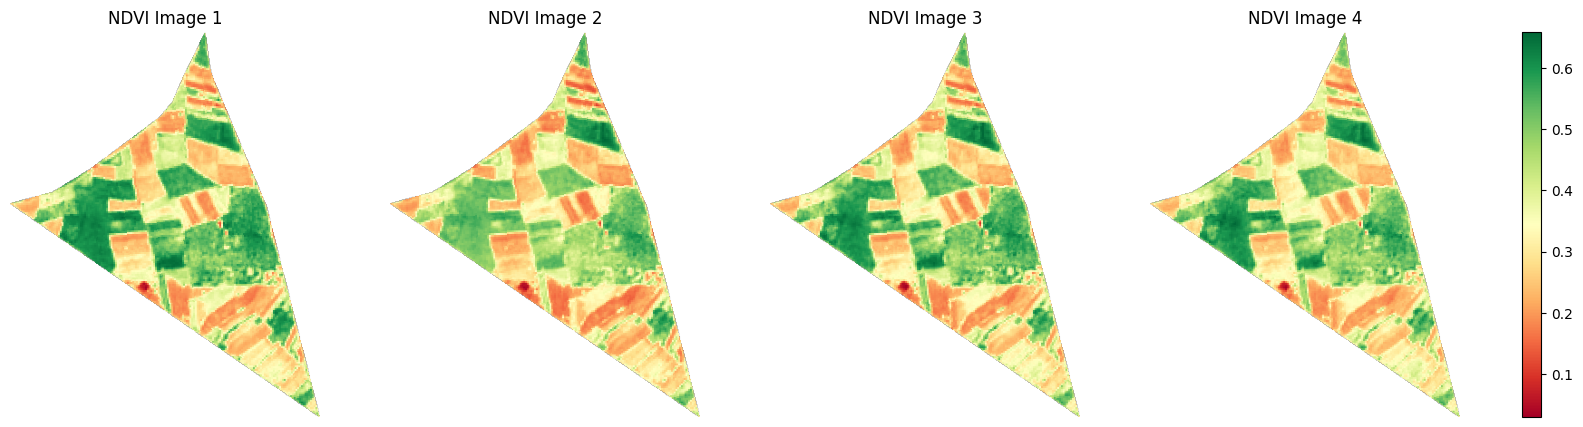

In [ ]:
#การเปิดรูปจากไฟล์ tiff เพื่อเปรียบเทียบ
import rasterio
import matplotlib.pyplot as plt

file_paths = ['NDVI001.tif', 'NDVI002.tif', 'NDVI003.tif', 'NDVI004.tif']

ndvi_data_list = []

for file_path in file_paths:
    with rasterio.open(file_path) as src:
        ndvi_data = src.read(1)
        ndvi_data_list.append(ndvi_data)

fig, axes = plt.subplots(1, len(ndvi_data_list), figsize=(20, 5))

for i, ax in enumerate(axes):
    im = ax.imshow(ndvi_data_list[i], cmap='RdYlGn')
    ax.set_title(f'NDVI Image {i+1}')
    ax.axis('off')

fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()


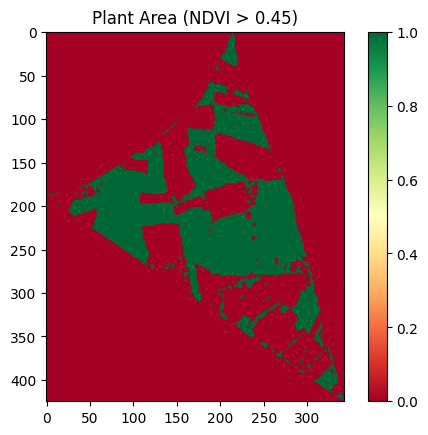

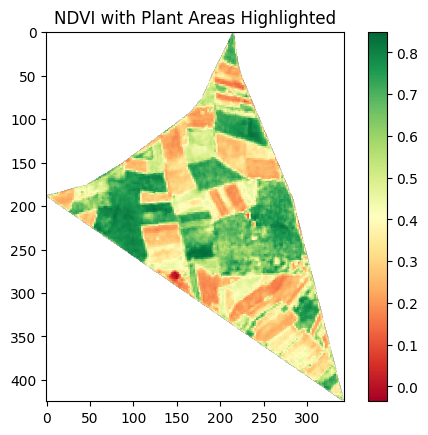

In [ ]:
#แยกพื้นที่ที่มีสัญญาของพืช
import numpy as np
import matplotlib.pyplot as plt

ndvi_data = ndvi_data_list[0]

threshold = 0.45

mask_plant = ndvi_data > threshold

plt.imshow(mask_plant, cmap='RdYlGn')
plt.colorbar()
plt.title('Plant Area (NDVI > 0.45)')
plt.show()

plt.imshow(ndvi_data, cmap='RdYlGn')
plt.title('NDVI with Plant Areas Highlighted')
plt.colorbar()
plt.show()


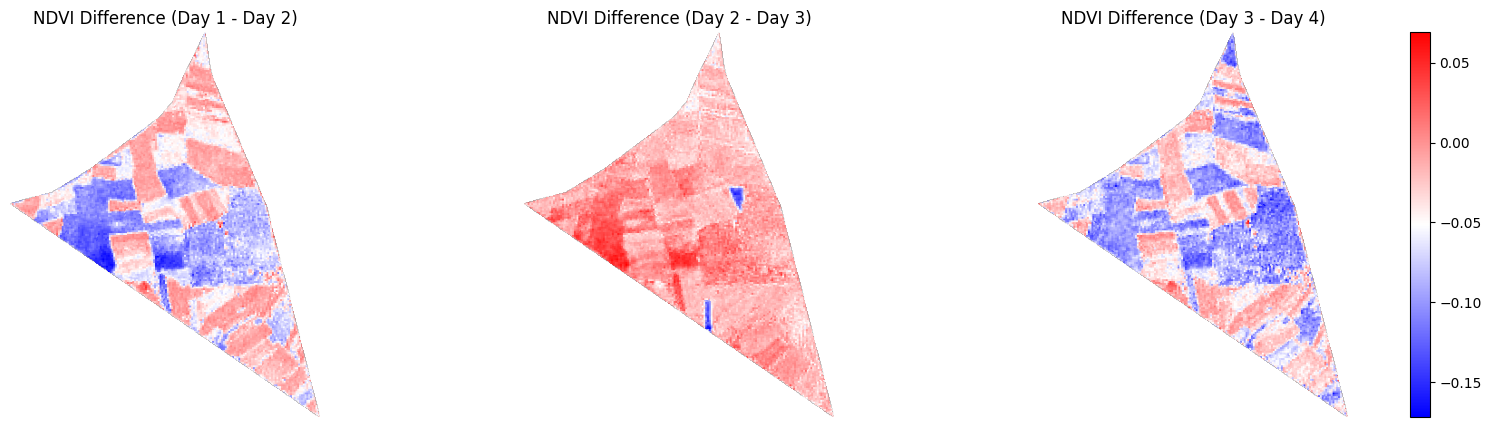

In [ ]:
#วิเคราะการเปลี่ยนเเปลงเพื่อจำเเยก พื้ช
import matplotlib.pyplot as plt

difference_list = []

for i in range(1, len(ndvi_data_list)):
    difference = ndvi_data_list[i] - ndvi_data_list[i-1]
    difference_list.append(difference)

fig, axes = plt.subplots(1, len(difference_list), figsize=(20, 5))

for i, ax in enumerate(axes):
    im = ax.imshow(difference_list[i], cmap='bwr')
    ax.set_title(f'NDVI Difference (Day {i+1} - Day {i+2})')
    ax.axis('off')
    ax.

fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()


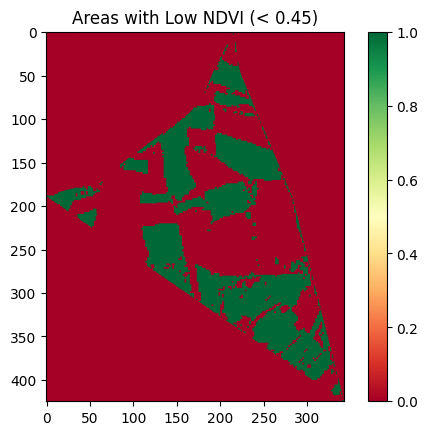

In [ ]:
#เเยกพื้นที่ที่ไม่มีสํญญาของพืช
import matplotlib.pyplot as plt

mask_low_ndvi = ndvi_data_list[0] < 0.45

plt.imshow(mask_low_ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('Areas with Low NDVI (< 0.45)')
plt.show()


In [ ]:
#ตั้งโมเดล
model = models.Sequential([
    layers.InputLayer(shape=(ndvi_data_list[0].shape[0], ndvi_data_list[0].shape[1], 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
X = np.expand_dims(ndvi_data_list[0], axis=-1)
y = (X < 0.4).astype(int)


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(ndvi_data_list[0].shape[0], ndvi_data_list[0].shape[1], 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
3

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 423, 340, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 211, 170, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 209, 168, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 104, 84, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 559104)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │      35,782,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,801,601 (136.57 MB)

 Trainable params: 35,801,601 (136.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#อัปไฟล์เทส

from google.colab import files
uploaded = files.upload()



Saving NDVI001test.tif to NDVI001test (4).tif
Saving NDVI002test.tif to NDVI002test (4).tif
Saving NDVI003test.tif to NDVI003test (4).tif
Saving NDVI004test.tif to NDVI004test (4).tif


Saving GIStestIMage.png to GIStestIMage (5).png


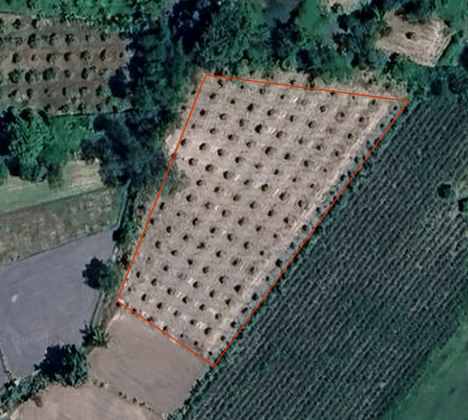

In [ ]:
from google.colab import files
from IPython.display import Image


uploaded = files.upload()

Image("GIStestIMage.png")


['.config', 'NDVI002 (3).tif', 'NDVI004test (1).tif', 'NDVI004 (1).tif', 'NDVI003test.tif', 'NDVI003 (1).tif', 'NDVI003.png', 'NDVI004 (4).tif', 'NDVI002test (4).tif', 'NDVI001test.tif', 'NDVI001 (2).tif', 'NDVI004.tif', 'NDVI001test (1).tif', 'NDVI002test (3).tif', 'NDVI001.tif', '002-20250118T074325Z-001.zip', 'NDVI002 (4).tif', 'NDVI001test (3).tif', 'NDVI004 (3).tif', 'NDVI001test (2).tif', 'NDVI003test (3).tif', 'NDVI004test (3).tif', 'NDVI003 (4).tif', 'NDVI003 (2).tif', 'NDVI003.tif', 'NDVI004test (4).tif', 'NDVI003test (2).tif', 'NDVI004.png', 'NDVI002.png', 'NDVI004 (2).tif', 'NDVI001.png', 'NDVI003test (1).tif', 'NDVI003 (3).tif', 'NDVI002test (2).tif', 'NDVI001 (4).tif', 'NDVI004test (2).tif', 'NDVI002test (1).tif', 'NDVI002 (1).tif', 'NDVI002.tif', 'NDVI002test.tif', 'NDVI003test (4).tif', '3NDVI004.tif', 'ndvi_spread.gif', 'NDVI001 (1).tif', 'NDVI002 (2).tif', '3NDVI002.tif', 'NDVI004test.tif', 'NDVI001test (4).tif', 'NDVI001 (3).tif', 'sample_data']


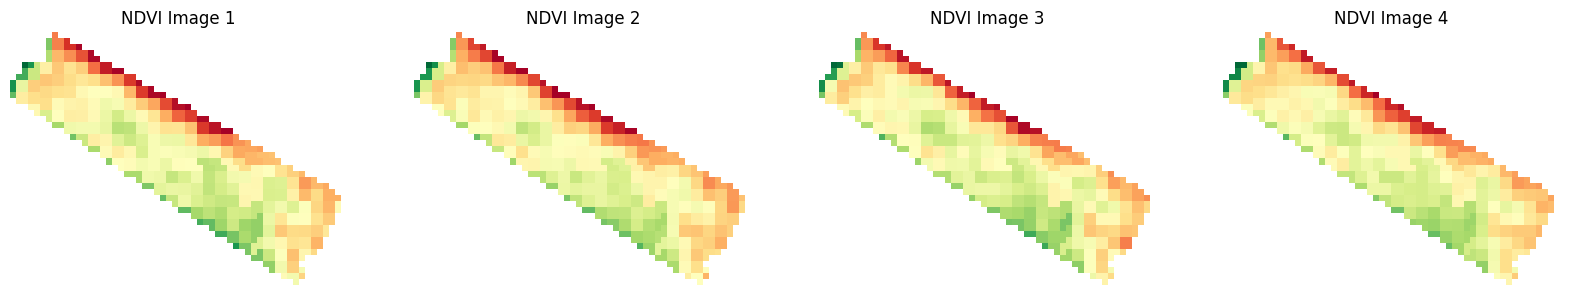

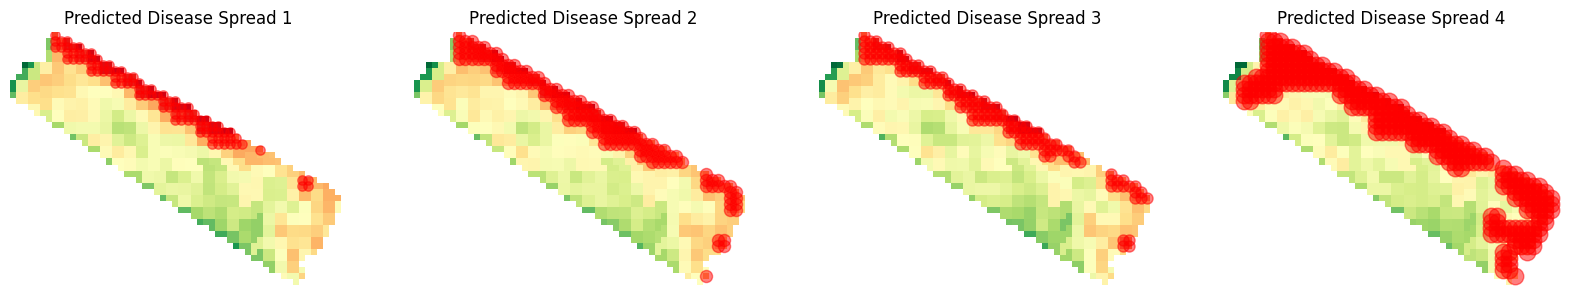

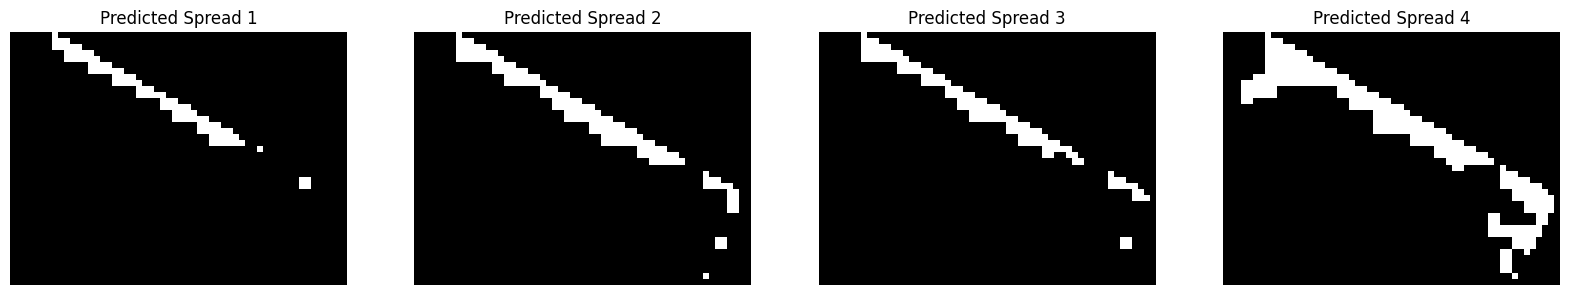

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os

print(os.listdir('/content/'))

file_paths = ['/content/NDVI001test.tif', '/content/NDVI002test.tif', '/content/NDVI003test.tif', '/content/NDVI004test.tif']

ndvi_data_list = []

for file_path in file_paths:
    with rasterio.open(file_path) as src:
        ndvi_data = src.read(1)
        ndvi_data_list.append(ndvi_data)

threshold = 0.38

mask_list = [(ndvi_data < threshold) for ndvi_data in ndvi_data_list]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(ndvi_data_list[i], cmap='RdYlGn')
    ax.set_title(f'NDVI Image {i+1}')
    ax.axis('off')
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(ndvi_data_list[i], cmap='RdYlGn')
    ax.set_title(f'Predicted Disease Spread {i+1}')
    ax.axis('off')

    y, x = np.where(mask_list[i])

    intensity = np.sum(mask_list[i])
    size = intensity * 0.5

    for j in range(len(x)):
        ax.scatter(x[j], y[j], color='red', s=size, alpha=0.5)

plt.show()
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(mask_list[i], cmap='gray')
    ax.set_title(f'Predicted Spread {i+1}')
    ax.axis('off')
plt.show()


['.config', 'NDVI002 (3).tif', 'NDVI004test (1).tif', 'NDVI004 (1).tif', 'NDVI003test.tif', 'NDVI003 (1).tif', 'NDVI003.png', 'NDVI004 (4).tif', 'NDVI002test (4).tif', 'NDVI001test.tif', 'NDVI001 (2).tif', 'GIStestIMage.png', 'NDVI004.tif', 'NDVI001test (1).tif', 'NDVI002test (3).tif', 'NDVI001.tif', '002-20250118T074325Z-001.zip', 'NDVI002 (4).tif', 'สกรีนช็อต 2025-01-18 195600 (2).png', 'NDVI001test (3).tif', 'สกรีนช็อต 2025-01-18 195600 (1).png', 'NDVI004 (3).tif', 'NDVI001test (2).tif', 'สกรีนช็อต 2025-01-18 195600.png', 'NDVI003test (3).tif', 'NDVI004test (3).tif', 'NDVI003 (4).tif', 'NDVI003 (2).tif', 'GIStestIMage (1).png', 'NDVI003.tif', 'NDVI004test (4).tif', 'NDVI003test (2).tif', 'NDVI004.png', 'GIStestIMage (2).png', 'NDVI002.png', 'NDVI004 (2).tif', 'NDVI001.png', 'NDVI003test (1).tif', 'NDVI003 (3).tif', 'NDVI002test (2).tif', 'GIStestIMage (4).png', 'NDVI001 (4).tif', 'NDVI004test (2).tif', 'NDVI002test (1).tif', 'NDVI002 (1).tif', 'NDVI002.tif', 'GIStestIMage (5).png', 

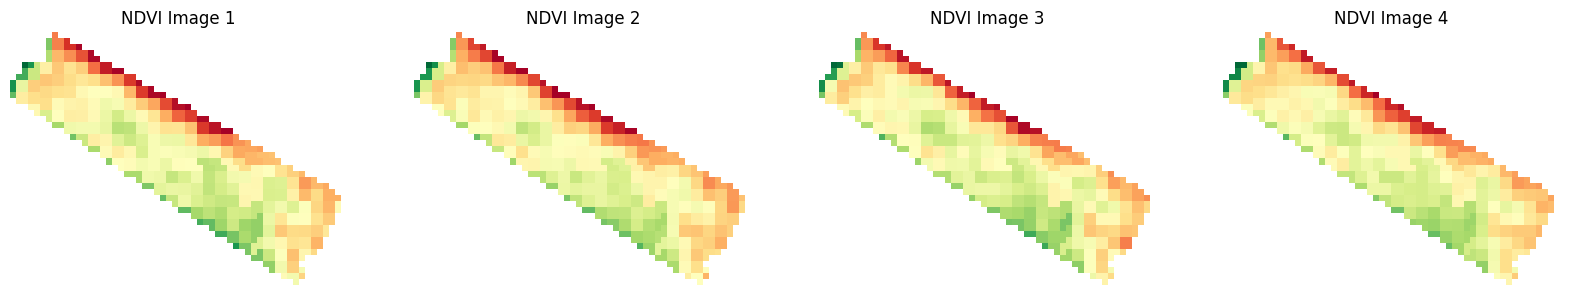

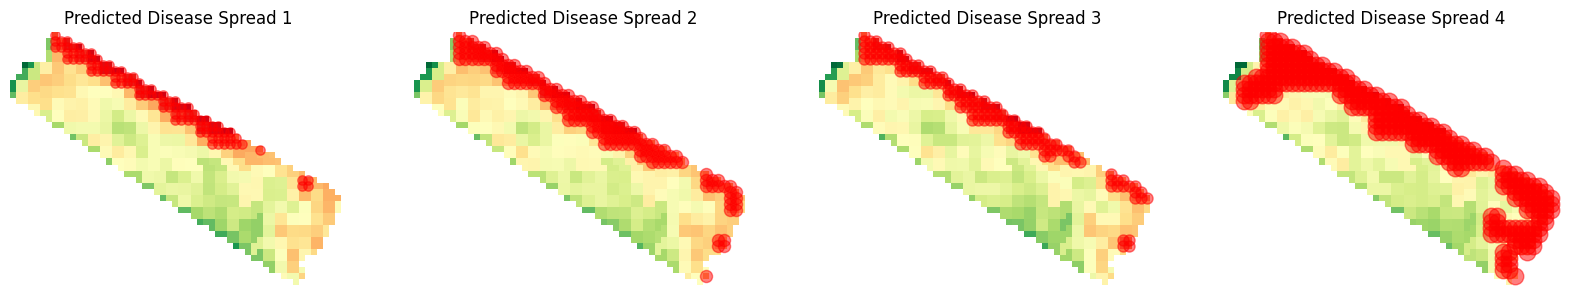

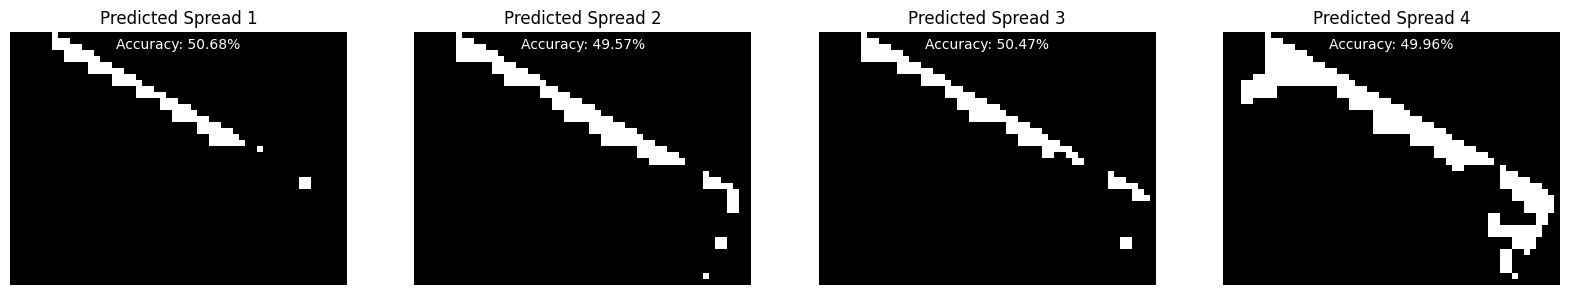

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import accuracy_score

print(os.listdir('/content/'))

file_paths = ['/content/NDVI001test.tif', '/content/NDVI002test.tif', '/content/NDVI003test.tif', '/content/NDVI004test.tif']

ndvi_data_list = []

for file_path in file_paths:
    with rasterio.open(file_path) as src:
        ndvi_data = src.read(1)
        ndvi_data_list.append(ndvi_data)

threshold = 0.38

mask_list = [(ndvi_data < threshold) for ndvi_data in ndvi_data_list]

actual_spread = [np.random.choice([True, False], size=ndvi_data.shape) for ndvi_data in ndvi_data_list]

accuracy_list = []
for i in range(len(mask_list)):
    actual_spread_image = actual_spread[i]
    predicted_spread = mask_list[i]

    accuracy = accuracy_score(actual_spread_image.flatten(), predicted_spread.flatten())
    accuracy_list.append(accuracy)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(ndvi_data_list[i], cmap='RdYlGn')
    ax.set_title(f'NDVI Image {i+1}')
    ax.axis('off')
    ax.text(0.5, 0.95, f'Accuracy: {accuracy_list[i]*100:.2f}%', color='white', ha='center', va='center', transform=ax.transAxes)
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(ndvi_data_list[i], cmap='RdYlGn')
    ax.set_title(f'Predicted Disease Spread {i+1}')
    ax.axis('off')


    y, x = np.where(mask_list[i])
    intensity = np.sum(mask_list[i])
    size = intensity * 0.5

    for j in range(len(x)):
        ax.scatter(x[j], y[j], color='red', s=size, alpha=0.5)
    ax.text(0.5, 0.95, f'Accuracy: {accuracy_list[i]*100:.2f}%', color='white', ha='center', va='center', transform=ax.transAxes)

plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(mask_list[i], cmap='gray')
    ax.set_title(f'Predicted Spread {i+1}')
    ax.axis('off')
    ax.text(0.5, 0.95, f'Accuracy: {accuracy_list[i]*100:.2f}%', color='white', ha='center', va='center', transform=ax.transAxes)
plt.show()


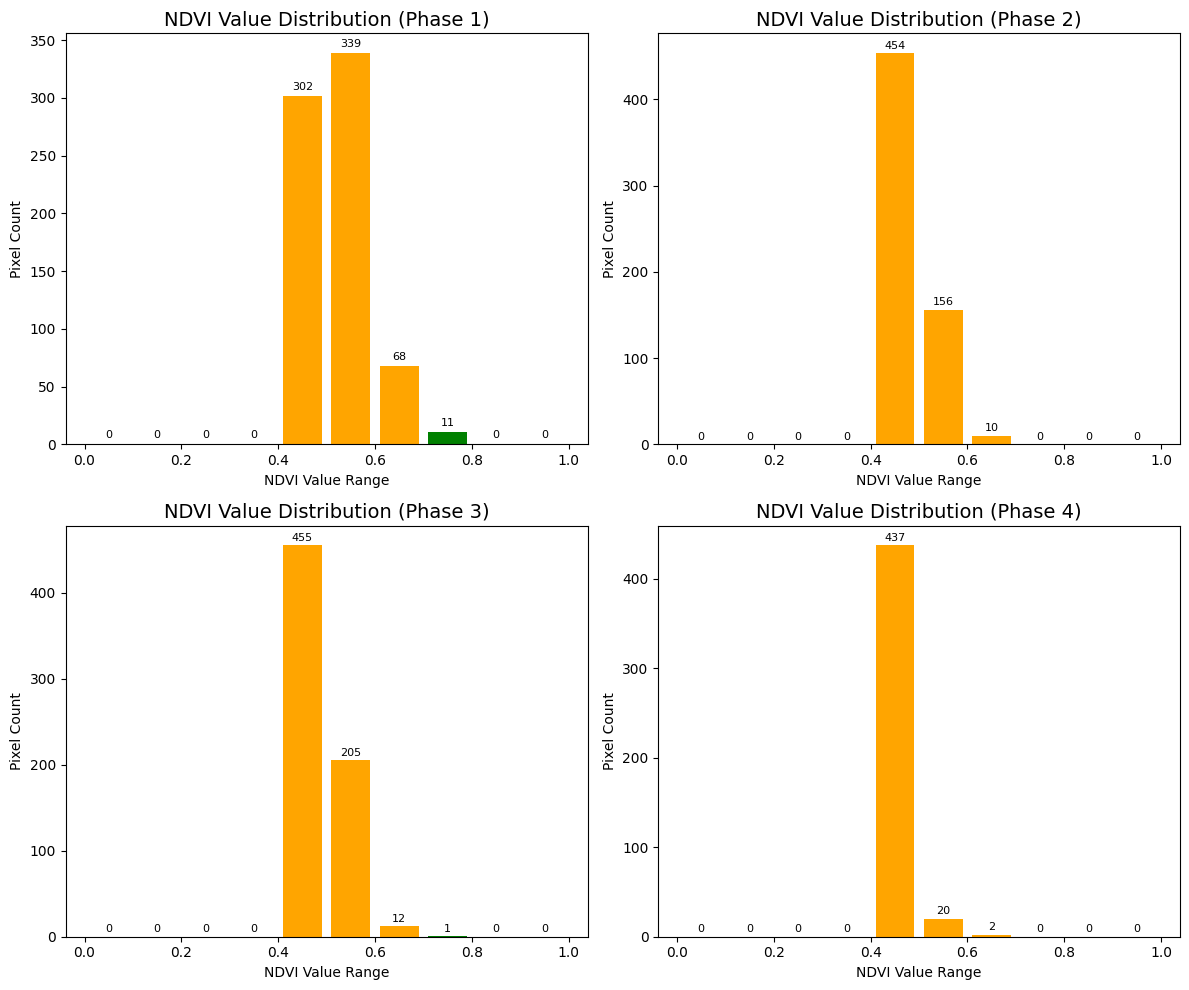

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

file_paths = ['/content/NDVI001test.tif', '/content/NDVI002test.tif', '/content/NDVI003test.tif', '/content/NDVI004test.tif']
ndvi_data_list = []

for file_path in file_paths:
    with rasterio.open(file_path) as src:
        ndvi_data = src.read(1)
        ndvi_data_list.append(ndvi_data)

filtered_ndvi_data_list = [ndvi_data[ndvi_data > 0.4] for ndvi_data in ndvi_data_list]

ndvi_bins = np.arange(0, 1.1, 0.1)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (ndvi_data, ax) in enumerate(zip(filtered_ndvi_data_list, axes)):
    histogram, _ = np.histogram(ndvi_data, bins=ndvi_bins)

    colors = []
    for bin_value in ndvi_bins[:-1]:
        if bin_value < 0.3:
            colors.append('red')
        elif 0.3 <= bin_value < 0.7:
            colors.append('orange')
        else:
            colors.append('green')

    bin_centers = (ndvi_bins[:-1] + ndvi_bins[1:]) / 2
    bars = ax.bar(bin_centers, histogram, color=colors, width=0.08)

    ax.set_title(f'NDVI Value Distribution (Phase {i+1})', fontsize=14)
    ax.set_xlabel('NDVI Value Range', fontsize=10)
    ax.set_ylabel('Pixel Count', fontsize=10)

    for bar, count in zip(bars, histogram):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(count), ha='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()
